Loading image

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [47]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show
    return img

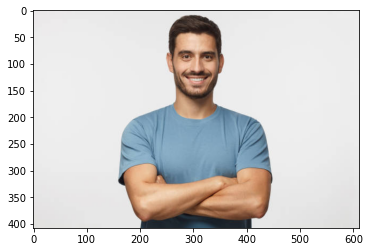

In [56]:
filename = "image.jpg"
img = read_file(filename)

orginal_img = np.copy(img)

Creating the edge masks

In [57]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #turning image from rgb to gray 
    gray_blur = cv2.medianBlur(gray, blue_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                      cv2.THRESH_BINARY, line_size, blue_value) #to get the edges of the image
    
    return edges

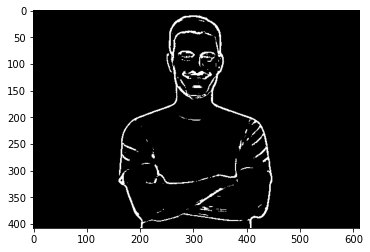

In [58]:
line_size, blur_value = 7,7 #defining the scale (thickness, how much it blurs)
edges = edge_mask(img, line_size, blur_value) #calling the method and defining it as edges so it doesnt show array matrix

plt.imshow(edges, cmap = "binary") #cmap changes the color of image from yellow to gray, use binary if you want background to be black
plt.show()



Reducing the colour palette

In [59]:
def reduce_colors(img, k): #k being the number of colours you want to show
    
    data = np.float32(img).reshape((-1,3)) #tranforming image
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001) #determining critera
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result
    
    
    

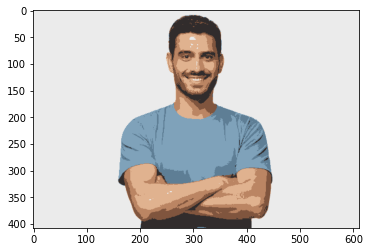

In [60]:
img = reduce_colors(img, k=7) #showing 3 most prominent colours
plt.imshow(img)
plt.show()

Reducing the noise in the image via using a filter

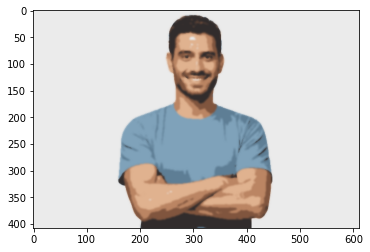

In [61]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor = 200, sigmaSpace = 200)

plt.imshow(blurred)
plt.show()

Combining the edge mask with the reduced colours

In [65]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask = edges)
    
    plt.imshow(c)
    plt.title("Cartoonified image")
    plt.show()
    
    plt.imshow(orginal_img)
    plt.title("Orginal image")
    plt.show()

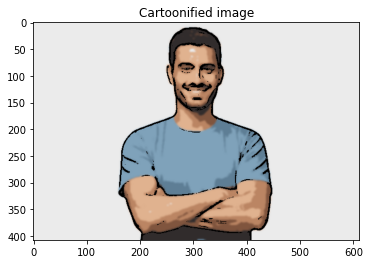

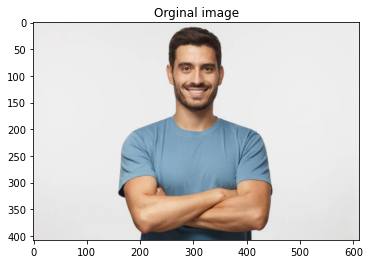

In [66]:
cartoon()